# Урок 2.  
# Масштабирование признаков.  
# L1- и L2-регуляризация.  
# Стохастический градиентный спуск

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
              [1, 1, 2, 1, 3, 0, 5, 10, 1, 2],
              [500, 700, 750, 600, 1450,
               800, 1500, 2000, 450, 1000],
              [1, 1, 2, 1, 2, 
               1, 3, 3, 1, 2]])

In [3]:
y = [45, 55, 50, 59, 65,
    35, 75, 80, 50, 60]

# Виды масштабирования признаков

![img/normalization.png](img/normalization.png)

### MinMaxScaler  

$$\large X_{norm} = \frac{X – X_{min}}{X_{max}-X_{min}}$$

In [4]:
X[1].min(), X[1].max()

(0, 10)

In [5]:
X[2].min(), X[2].max()

(450, 2000)

In [6]:
X_norm = X.copy()
X_norm = X_norm.astype(np.float64)
X_norm

array([[1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00,
        1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00],
       [1.00e+00, 1.00e+00, 2.00e+00, 1.00e+00, 3.00e+00, 0.00e+00,
        5.00e+00, 1.00e+01, 1.00e+00, 2.00e+00],
       [5.00e+02, 7.00e+02, 7.50e+02, 6.00e+02, 1.45e+03, 8.00e+02,
        1.50e+03, 2.00e+03, 4.50e+02, 1.00e+03],
       [1.00e+00, 1.00e+00, 2.00e+00, 1.00e+00, 2.00e+00, 1.00e+00,
        3.00e+00, 3.00e+00, 1.00e+00, 2.00e+00]])

In [7]:
X_norm[1] = (X[1] - X[1].min()) / (X[1].max() - X[1].min())
X_norm

array([[1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00,
        1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00],
       [1.00e-01, 1.00e-01, 2.00e-01, 1.00e-01, 3.00e-01, 0.00e+00,
        5.00e-01, 1.00e+00, 1.00e-01, 2.00e-01],
       [5.00e+02, 7.00e+02, 7.50e+02, 6.00e+02, 1.45e+03, 8.00e+02,
        1.50e+03, 2.00e+03, 4.50e+02, 1.00e+03],
       [1.00e+00, 1.00e+00, 2.00e+00, 1.00e+00, 2.00e+00, 1.00e+00,
        3.00e+00, 3.00e+00, 1.00e+00, 2.00e+00]])

In [8]:
X_norm[2] = (X[2] - X[2].min()) / (X[2].max() - X[2].min())
X_norm

array([[1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ],
       [0.1       , 0.1       , 0.2       , 0.1       , 0.3       ,
        0.        , 0.5       , 1.        , 0.1       , 0.2       ],
       [0.03225806, 0.16129032, 0.19354839, 0.09677419, 0.64516129,
        0.22580645, 0.67741935, 1.        , 0.        , 0.35483871],
       [1.        , 1.        , 2.        , 1.        , 2.        ,
        1.        , 3.        , 3.        , 1.        , 2.        ]])

### Стандартизация  

$$\large X_{norm} = \frac{X – X_{mean}}{std}$$

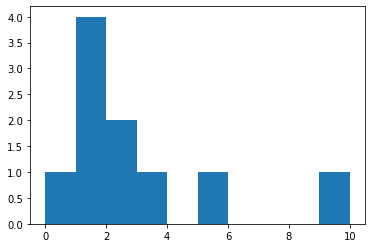

In [9]:
plt.hist(X[1]);

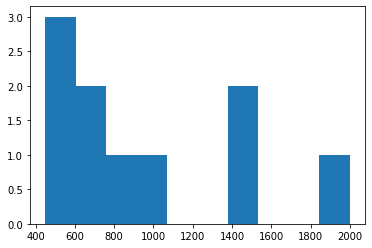

In [10]:
plt.hist(X[2]);

In [11]:
X1_mean = X[1].mean()
X1_mean

2.6

In [12]:
X1_std = X[1].std()
X1_std

2.8000000000000003

In [13]:
X_st = X.copy().astype(np.float64)

In [14]:
X_st[1] = (X[1] - X1_mean) / X1_std
X_st

array([[ 1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
         1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
         1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
         1.00000000e+00],
       [-5.71428571e-01, -5.71428571e-01, -2.14285714e-01,
        -5.71428571e-01,  1.42857143e-01, -9.28571429e-01,
         8.57142857e-01,  2.64285714e+00, -5.71428571e-01,
        -2.14285714e-01],
       [ 5.00000000e+02,  7.00000000e+02,  7.50000000e+02,
         6.00000000e+02,  1.45000000e+03,  8.00000000e+02,
         1.50000000e+03,  2.00000000e+03,  4.50000000e+02,
         1.00000000e+03],
       [ 1.00000000e+00,  1.00000000e+00,  2.00000000e+00,
         1.00000000e+00,  2.00000000e+00,  1.00000000e+00,
         3.00000000e+00,  3.00000000e+00,  1.00000000e+00,
         2.00000000e+00]])

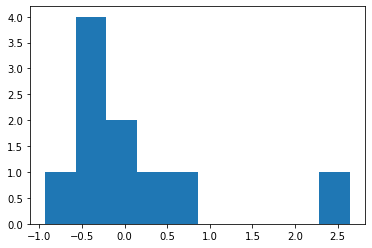

In [15]:
plt.hist(X_st[1]);

In [16]:
def custom_StandardScaler(x):
    res = (x - x.mean()) / x.std()
    return res

In [17]:
X_st[2] = custom_StandardScaler(X[2])

In [18]:
X_st[3] = custom_StandardScaler(X[3])
X_st

array([[ 1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
         1.        ,  1.        ,  1.        ,  1.        ,  1.        ],
       [-0.57142857, -0.57142857, -0.21428571, -0.57142857,  0.14285714,
        -0.92857143,  0.85714286,  2.64285714, -0.57142857, -0.21428571],
       [-0.97958969, -0.56713087, -0.46401617, -0.77336028,  0.97958969,
        -0.36090146,  1.08270439,  2.11385144, -1.08270439,  0.05155735],
       [-0.89625816, -0.89625816,  0.38411064, -0.89625816,  0.38411064,
        -0.89625816,  1.66447944,  1.66447944, -0.89625816,  0.38411064]])

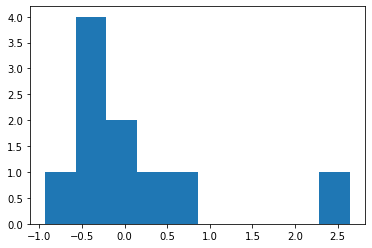

In [19]:
plt.hist(X_st[1]);

# SGD

![img/lr_gradient_descent.gif](img/lr_gradient_descent.gif)

Как нейронные сети обучаются с помощью градиентного спуска:  
https://www.youtube.com/watch?v=IHZwWFHWa-w

In [20]:
def calc_mse(y, y_pred):
    err = np.mean((y - y_pred)**2)
    return err

In [21]:
def eval_model(X, y, iterations, alpha=1e-4):
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    for i in range(1, iterations+1):
        y_pred = np.dot(W, X)
        err = calc_mse(y, y_pred)
        W -= (alpha * (1/n * 2 * np.dot((y_pred - y), X.T)))
        if i % (iterations / 10) == 0:
            print(f'# итерация: {i}, MSE: {err}, веса: {W}')
    return W

In [22]:
eval_model(X_st, y, iterations=1000, alpha=1e-2)

# итерация: 100, MSE: 99.5758475220652, веса: [49.88556291  3.79923577  3.57193517  4.22453504]
# итерация: 200, MSE: 41.47525838608048, веса: [56.40343869  4.26762696  3.24282202  4.13542786]
# итерация: 300, MSE: 40.23898929926727, веса: [57.26783648  4.62808185  2.95217337  4.0689065 ]
# итерация: 400, MSE: 40.07590461083065, веса: [57.38247253  4.91562235  2.70731668  4.02892709]
# итерация: 500, MSE: 39.979129131994966, веса: [57.39767552  5.14562222  2.50125971  4.00731094]
# итерация: 600, MSE: 39.91458661626861, веса: [57.39969173  5.33006291  2.32799291  3.99813193]
# итерация: 700, MSE: 39.87113263303464, веса: [57.39995912  5.47833621  2.18240192  3.9971546 ]
# итерация: 800, MSE: 39.84171109462107, веса: [57.39999458  5.59782258  2.06014364  4.00137977]
# итерация: 900, MSE: 39.8216944226625, веса: [57.39999928  5.69433669  1.95753684  4.00870828]
# итерация: 1000, MSE: 39.80802003009241, веса: [57.3999999   5.77247148  1.87146632  4.01769276]


array([57.3999999 ,  5.77247148,  1.87146632,  4.01769276])

In [23]:
def eval_sgd_model(X, y, iterations, qty_in_batch, alpha=1e-4):
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    n_batch = n // qty_in_batch
    if n % qty_in_batch != 0:
        n_batch += 1
    for i in range(1, iterations+1):
        for b in range(n_batch):
            start_ = qty_in_batch*b
            end_ = qty_in_batch*(b+1)
            X_tmp = X[:, start_ : end_]
            y_tmp = y[start_ : end_]
            y_pred_tmp = np.dot(W, X_tmp)
            err = calc_mse(y_tmp, y_pred_tmp)
            W -= (alpha * (1/n * 2 * np.dot((y_pred_tmp - y_tmp), X_tmp.T)))
        if i % (iterations / 10) == 0:
            print(f'# итерация: {i}, MSE: {err}, веса: {W}')
    return W

In [24]:
eval_sgd_model(X_st, y, iterations=5000, qty_in_batch=5, alpha=1e-2)

# итерация: 500, MSE: 42.3109780044859, веса: [57.39640762  5.27039101  2.7719779   3.63393594]
# итерация: 1000, MSE: 39.89583042117961, веса: [57.39822575  5.79596373  1.9699369   3.9185532 ]
# итерация: 1500, MSE: 38.9332606566591, веса: [57.39796511  6.00411465  1.64376816  4.03994155]
# итерация: 2000, MSE: 38.54459897414352, веса: [57.39786036  6.0873287   1.51124797  4.09062825]
# итерация: 2500, MSE: 38.38686216017567, веса: [57.39781811  6.12078955  1.45743636  4.1115423 ]
# итерация: 3000, MSE: 38.32277162218946, веса: [57.39780103  6.13429217  1.43559283  4.12011252]
# итерация: 3500, MSE: 38.29673273201784, веса: [57.39779411  6.13975268  1.42672776  4.1236103 ]
# итерация: 4000, MSE: 38.286157273303104, веса: [57.39779131  6.1419638   1.42313037  4.12503445]
# итерация: 4500, MSE: 38.2818635718851, веса: [57.39779017  6.14285984  1.42167067  4.12561347]
# итерация: 5000, MSE: 38.28012073521448, веса: [57.39778971  6.14322313  1.4210784   4.12584869]


array([57.39778971,  6.14322313,  1.4210784 ,  4.12584869])

### Регуляризация  

По сути, регуляризация - это ограничение модели.  
Для нас это, прежде всего, способ уменьшить сложность модели, чтобы предотвратить переобучение.
Проблема: признаки могут иметь линейную (или почти линейную) зависимость.  
Если у нас есть такие признаки, модель будет не устойчива к изменению в данных (большой variance).  
Чтобы побороть этот эффект, модель при обучении дополнительно ограничивают, используя **регуляризацию**.

Подробнее здесь:  
https://habr.com/ru/company/ods/blog/323890/  
и здесь:  
https://habr.com/ru/company/ods/blog/322076/  

L1 регуляризация

$$\Large \mathcal{L}_{reg} \left(X, \vec{y}, \vec{w}\right) = \mathcal{L}\left(X, \vec{y}, \vec{w}\right)  + \lambda \sum_{j=1}^m \left| w_j \right|$$

L2 регуляризация

$$\Large \mathcal{L}_{reg} \left(X, \vec{y}, \vec{w}\right) = \mathcal{L}\left(X, \vec{y}, \vec{w}\right) + \lambda \frac{1}{2} \sum_{j=1}^m w_j^2$$

In [25]:
def eval_model_reg2(X, y, iterations, alpha=1e-4, lambda_=1e-8):
    np.random.seed(42)
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    for i in range(1, iterations+1):
        y_pred = np.dot(W, X)
        err = calc_mse(y, y_pred)
        W -= alpha * (1/n * 2 * np.dot((y_pred - y), X.T) + lambda_ * W) 
        if i % (iterations / 10) == 0:
            print(f'# итерация: {i}, MSE: {err}, веса: {W}')
    return W

In [26]:
eval_model_reg2(X_st, y, iterations=5000, alpha=1e-2, lambda_=1e-4)

# итерация: 500, MSE: 39.98166412253417, веса: [57.39479705  5.10767868  2.46037345  4.08674902]
# итерация: 1000, MSE: 39.807231204063974, веса: [57.39713005  5.765859    1.85689028  4.03893236]
# итерация: 1500, MSE: 39.782405042800356, веса: [57.39713014  5.99060723  1.60529698  4.06885866]
# итерация: 2000, MSE: 39.77852356578889, веса: [57.39713014  6.07152025  1.50155606  4.09300748]
# итерация: 2500, MSE: 39.77788748617128, веса: [57.39713014  6.10185559  1.45905205  4.10572941]
# итерация: 3000, MSE: 39.7777793047026, веса: [57.39713014  6.11355928  1.44170275  4.11160375]
# итерация: 3500, MSE: 39.777759834058934, веса: [57.39713014  6.11816175  1.43463681  4.11416107]
# итерация: 4000, MSE: 39.77775594321602, веса: [57.39713014  6.11999396  1.43176283  4.1152412 ]
# итерация: 4500, MSE: 39.777755024514185, веса: [57.39713014  6.12072893  1.43059479  4.11568989]
# итерация: 5000, MSE: 39.77775476050768, веса: [57.39713014  6.12102515  1.4301203   4.11587451]


array([57.39713014,  6.12102515,  1.4301203 ,  4.11587451])

### Домашнее задание:  
1. Постройте график зависимости весов всех признаков от lambda в L2-регуляризации (на данных из урока).
2. Можно ли к одному и тому же признаку применить сразу и нормализацию, и стандартизацию?  
3. Напишите функцию наподобие eval_model_reg2, но для применения L1-регуляризации *.

#### 1. Постройте график зависимости весов всех признаков от lambda в L2-регуляризации (на данных из урока).

In [27]:
def eval_model_reg2_1(X, y, iterations, alpha=1e-4, lambda_=1e-8):
    np.random.seed(42)
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    for i in range(1, iterations+1):
        y_pred = np.dot(W, X)
        err = calc_mse(y, y_pred)
        W -= alpha * (1/n * 2 * np.dot((y_pred - y), X.T) + lambda_ * W)    
    return W

In [28]:
lambda_ = []
weight_0 = []
weight_1 = []
weight_2 = []
weight_3 = []

for i in range(8):
    lambda_.append(1/(10 ** i))
    weight_0.append(eval_model_reg2_1(X_st, y, iterations=5000, alpha=1e-2, lambda_=1/(10**i))[0])
    weight_1.append(eval_model_reg2_1(X_st, y, iterations=5000, alpha=1e-2, lambda_=1/(10**i))[1])
    weight_2.append(eval_model_reg2_1(X_st, y, iterations=5000, alpha=1e-2, lambda_=1/(10**i))[2])
    weight_3.append(eval_model_reg2_1(X_st, y, iterations=5000, alpha=1e-2, lambda_=1/(10**i))[3])

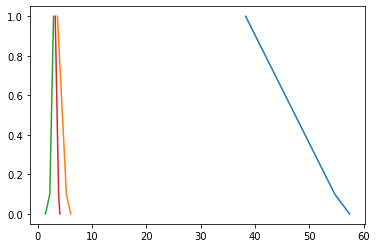

In [29]:
plt.plot(weight_0, lambda_)
plt.plot(weight_1, lambda_)
plt.plot(weight_2, lambda_)
plt.plot(weight_3, lambda_);

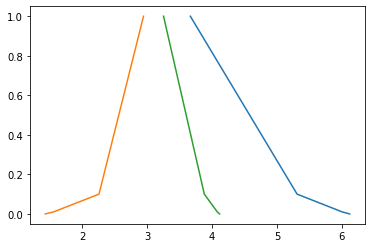

In [30]:
plt.plot(weight_1, lambda_)
plt.plot(weight_2, lambda_)
plt.plot(weight_3, lambda_);

#### 2. Можно ли к одному и тому же признаку применить сразу и нормализацию, и стандартизацию?

После нормализации данные по признаку будут расположенны в интервале между 0 и 1, а после стандартизации
среднеквадратичное отклонение будет 1, а среднее значение 0. Т.е. это две противоположные ситуации, и при одновременном 
применении, если мы сначала данные нормализуем, а потом стандартизируем, то данные будут будут полностью стандартизованны. 
А если мы сначала данные стандартизируем, а потом нормализируем, то они будут полностью нормализованны. 

Поэтому в одновременном применении нормализации и стандартизации данных смысла нет.

#### 3. Напишите функцию наподобие eval_model_reg2, но для применения L1-регуляризации *.

In [31]:
def eval_model_reg1(X, y, iterations, alpha=1e-4, lambda_=1e-8):
    np.random.seed(42)
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    for i in range(1, iterations+1):
        y_pred = np.dot(W, X)
        err = calc_mse(y, y_pred)
        W -= alpha * (1/n * 2 * np.dot((y_pred - y), X.T) + lambda_ * np.sign(W))
        if i % (iterations / 10) == 0:
            print(f'# итерация: {i}, MSE: {err}, веса: {W}')
    return W

In [32]:
eval_model_reg1(X_st, y, iterations=5000, alpha=1e-2, lambda_=1e-8)

# итерация: 500, MSE: 39.98154848347991, веса: [57.3976656   5.10794282  2.46013454  4.08693806]
# итерация: 1000, MSE: 39.80712257854249, веса: [57.3999999   5.76653146  1.85622321  4.03914637]
# итерация: 1500, MSE: 39.78234065774944, веса: [57.39999999  5.99153675  1.60432664  4.06912267]
# итерация: 2000, MSE: 39.77848905959952, веса: [57.39999999  6.07258433  1.50040894  4.09331596]
# итерация: 2500, MSE: 39.77786771876229, веса: [57.39999999  6.10298573  1.45781125  4.10606673]
# итерация: 3000, MSE: 39.777766055396015, веса: [57.39999999  6.11472089  1.44041502  4.11195715]
# итерация: 3500, MSE: 39.77774933480004, веса: [57.39999999  6.11933808  1.43332642  4.11452273]
# итерация: 4000, MSE: 39.777746579595025, веса: [57.39999999  6.12117707  1.43044178  4.11560687]
# итерация: 4500, MSE: 39.777746125287976, веса: [57.39999999  6.12191514  1.42926882  4.11605745]
# итерация: 5000, MSE: 39.77774605035887, веса: [57.39999999  6.12221275  1.4287921   4.11624295]


array([57.39999999,  6.12221275,  1.4287921 ,  4.11624295])